## Random Forest Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
A Random Forest model with 113 trees yielded an accuracy of 81.21% when trained on slope data and precipitation and wind data over a 5 day period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [2]:
df = pd.read_csv("dataset.csv")
len(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17808

In [3]:
df['severity'].value_counts()

medium          5594
small           2612
unknown          834
large            679
...              359
very_large       102
Medium            72
Unknown           19
Large             17
Small             10
catastrophic       4
landslide          2
Very_large         1
Very...large       1
Name: severity, dtype: int64

In [4]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))

17808


In [5]:
X = df.copy()
y = X.landslide
columns=[]
for i in range(9, 4, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
columns.append('slope')
# columns.append('forest2')
columns.append('osm')
X = X[columns]
X

,humidity9,ARI9,humidity8,ARI8,humidity7,ARI7,humidity6,ARI6,humidity5,ARI5,slope,osm
0,96,4.022861,95,3.916090,97,1.409127,99,2.817276,94,0.916551,19.245,7798
1,98,4.103260,98,9.561101,99,5.796450,98,5.166752,98,3.782236,30.919,40270
2,94,0.136755,99,0.031048,97,1.785954,97,1.769417,98,1.124490,2.966,14
3,92,0.583102,90,1.871443,89,4.502031,91,4.552002,90,7.615655,1.806,1126
4,98,0.374315,99,0.510198,98,0.153517,99,0.064768,99,0.236474,16.977,4478
...,...,...,...,...,...,...,...,...,...,...,...,...
17803,23,0.000000,18,0.000000,19,0.000000,20,0.000000,19,0.000000,1.699,269
17804,97,0.105756,100,0.067421,100,0.029698,87,0.000000,84,0.000000,3.063,101
17805,99,2.374114,98,5.055324,98,5.819724,97,2.119434,97,4.314101,31.138,34403
17806,83,0.049610,96,0.022049,96,0.872306,99,0.222914,84,0.101057,2.563,4138


## Scaling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Prediction

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
pred = model.predict(X_test)
print("ACCURACY:", accuracy_score(pred, y_test))

ACCURACY: 0.847557551937114


In [9]:
best = 1
highest = 0

for i in range(85, 150, 2):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("n_estimators =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
print("# of trees:", best, highest)

n_estimators = 85   ACCURACY: 84.25
n_estimators = 87   ACCURACY: 84.67
n_estimators = 89   ACCURACY: 84.14
n_estimators = 91   ACCURACY: 84.36
n_estimators = 93   ACCURACY: 84.53
n_estimators = 95   ACCURACY: 84.62
n_estimators = 97   ACCURACY: 84.36
n_estimators = 99   ACCURACY: 84.45
n_estimators = 101   ACCURACY: 84.36
n_estimators = 103   ACCURACY: 84.7
n_estimators = 105   ACCURACY: 84.62
n_estimators = 107   ACCURACY: 84.39
n_estimators = 109   ACCURACY: 84.36
n_estimators = 111   ACCURACY: 84.08
n_estimators = 113   ACCURACY: 84.59
n_estimators = 115   ACCURACY: 84.14
n_estimators = 117   ACCURACY: 84.11
n_estimators = 119   ACCURACY: 84.42
n_estimators = 121   ACCURACY: 84.22
n_estimators = 123   ACCURACY: 84.42
n_estimators = 125   ACCURACY: 84.76
n_estimators = 127   ACCURACY: 84.5
n_estimators = 129   ACCURACY: 84.28
n_estimators = 131   ACCURACY: 84.39
n_estimators = 133   ACCURACY: 84.48
n_estimators = 135   ACCURACY: 84.14
n_estimators = 137   ACCURACY: 84.31
n_estimator

In [10]:
rf = RandomForestClassifier(n_estimators = 139)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

0.8450308815272319


array([[1199,  289],
       [ 263, 1811]])

In [7]:
array = [[1254,245],[161,1902]]

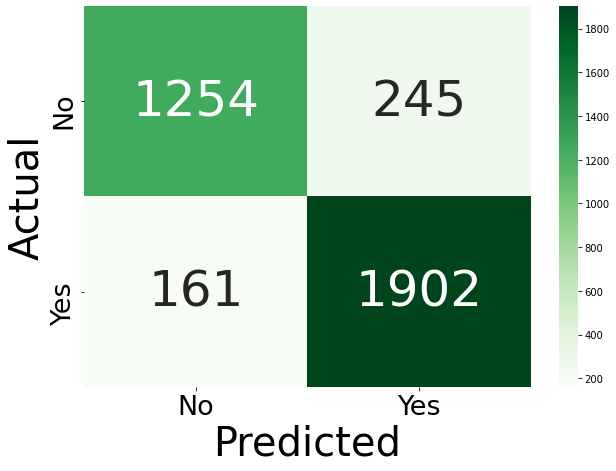

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary=True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("RF Matrix", bbox_inches="tight")

plt.show()